In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
data_analysis_df = pd.read_csv('4142_04_04_2024.csv',delimiter=',')

In [3]:
try:
    data_analysis_df.drop(columns=['Unnamed: 0'],inplace=True)
except:
    print('already clean or error')

In [4]:
data_analysis_df.rename(columns={'kappa':'$\\kappa$'},inplace=True)

In [5]:
data_analysis_df.head(10)

,scenario,half_hat,K,rel_oracle_time,C_bar_size,num_min_loc,mult,$\kappa$,upsilon,n,m
0,0,1.0,2.992032,0.018237,9943,477,0.5,0.0002,0.0,500.0,10000.0
1,1,1.0,1.996016,0.010081,9921,476,0.5,0.0002,0.0,500.0,10000.0
2,2,1.0,1.996016,0.010093,9944,476,0.5,0.0002,0.0,500.0,10000.0
3,3,1.0,3.992032,0.029078,9943,476,0.5,0.0002,0.0,500.0,10000.0
4,4,1.0,2.988048,0.018268,9926,477,0.5,0.0002,0.0,500.0,10000.0
5,5,1.0,2.992032,0.018224,9916,476,0.5,0.0002,0.0,500.0,10000.0
6,6,1.0,2.988048,0.018198,9942,476,0.5,0.0002,0.0,500.0,10000.0
7,7,1.0,1.996016,0.010092,9926,476,0.5,0.0002,0.0,500.0,10000.0
8,8,1.0,2.000000,0.010087,9931,476,0.5,0.0002,0.0,500.0,10000.0
9,9,1.0,1.992032,0.010058,9944,476,0.5,0.0002,0.0,500.0,10000.0


In [6]:
data_analysis_df['log_rel_oracle_time'] = np.log(data_analysis_df['rel_oracle_time'].values)
data_analysis_df['rel_C_bar_size'] = data_analysis_df['C_bar_size'].values / np.mean(data_analysis_df['m'])
data_analysis_df['rel_num_min_loc'] = data_analysis_df['num_min_loc'].values / np.mean(data_analysis_df['n'])

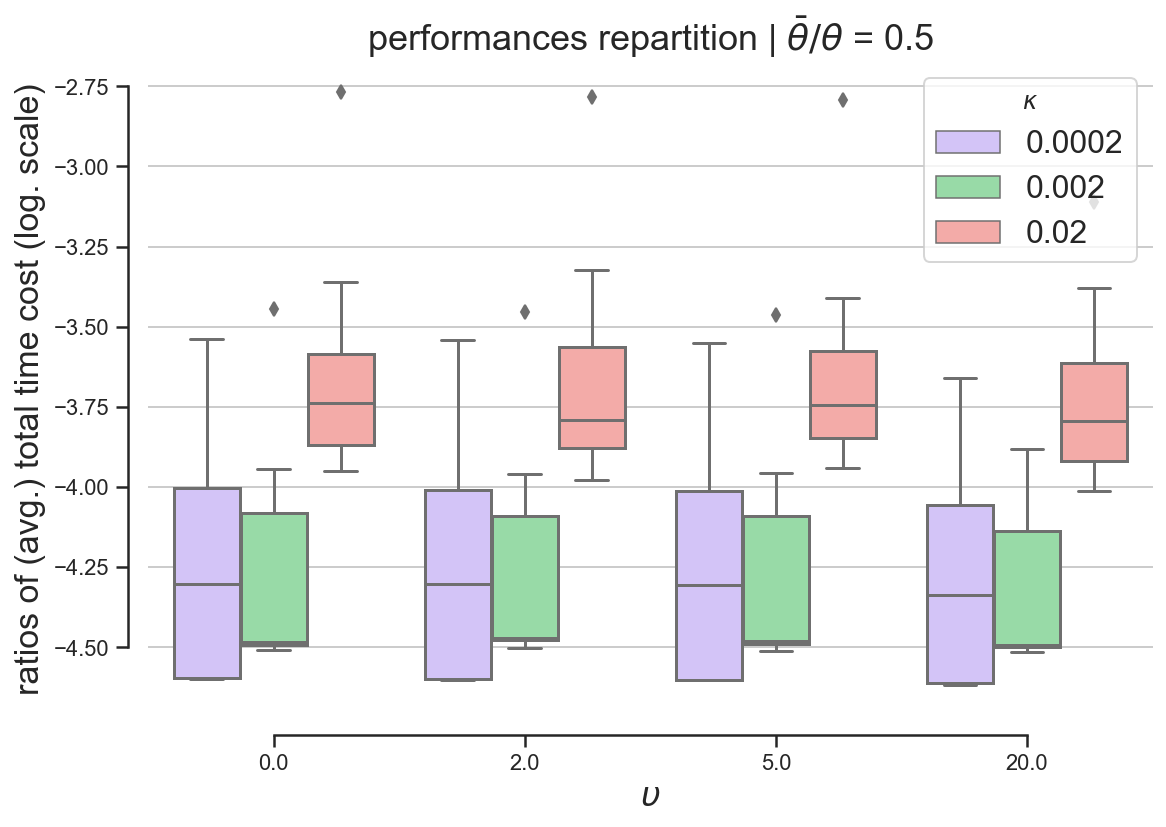

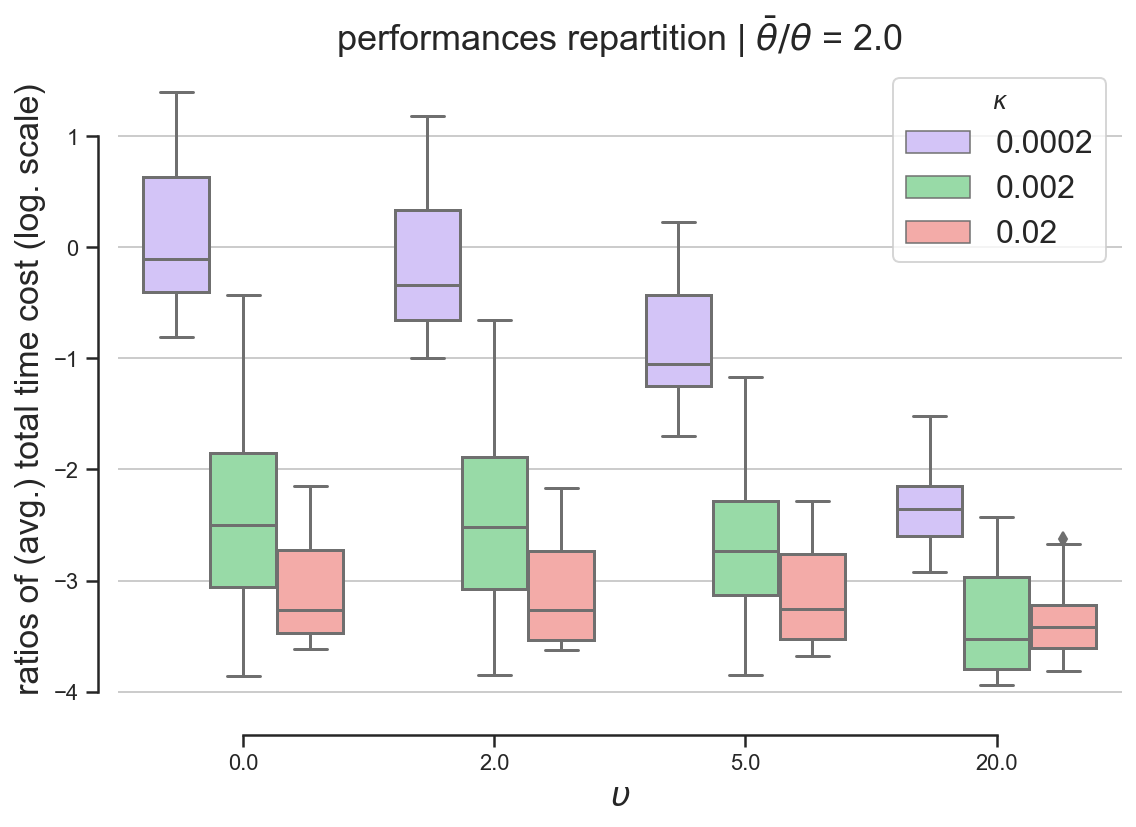

In [17]:
sns.set_theme(style="ticks", palette="pastel")
upsilon_span = [min(data_analysis_df['upsilon'].values),max(data_analysis_df['upsilon'].values)]
for mult in np.unique(data_analysis_df['mult'].values):
    plt.figure(figsize=(9,6))
    plt.grid()
    local_df = data_analysis_df[data_analysis_df['mult']==mult]
    local_time_values = local_df['log_rel_oracle_time'].values
    #if max(local_time_values)>0:
    #    plt.plot(upsilon_span,[0,0],label='enumeration scheme (neutral ref.)',color='k',linestyle='-.')
    #else:
    #    plt.plot([],[],label='enumeration scheme (0 - neutral ref)',color='k',linestyle='-.')
    plt.title('performances repartition | $\\bar{\\theta}/\\theta$ = '+str(mult),fontsize=18)
    gfg = sns.boxplot(x="upsilon", y="log_rel_oracle_time",
            hue="$\\kappa$", palette=["m", "g","r"],
            data=local_df)
    sns.despine(offset=10, trim=True)
    gfg.legend(title='$\\kappa$',fontsize=16)
    plt.xlabel('$\\upsilon$',fontsize=17)
    plt.ylabel('ratios of (avg.) total time cost (log. scale)',fontsize=17)
    plt.savefig('raw_results_mult_'+str(mult)+'.pdf',dpi=500)